In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
# Load the CO2 concentration data
country = 'India'
df = pd.read_csv("../../../data/processed/co2_country.csv", index_col='year', parse_dates=True)
df = df.loc[df['country'] == country, ['co2']]
df.head()
df.to_csv

FileNotFoundError: [Errno 2] No such file or directory: '../../../data/processed/co2_country.csv'

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df['co2'].values.reshape(-1, 1))

In [ ]:
train_size = int(len(data) * 0.9)
train_data, test_data = data[:train_size,:], data[train_size:,:]

In [ ]:
# Create the training and testing datasets
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)

In [ ]:

time_steps = 5
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

In [ ]:
data

array([[0.        ],
       [0.0011021 ],
       [0.00238732],
       [0.00287022],
       [0.00427059],
       [0.00667716],
       [0.00776   ],
       [0.01152768],
       [0.01310626],
       [0.01523231],
       [0.01896185],
       [0.02238972],
       [0.02698766],
       [0.03071116],
       [0.02959509],
       [0.03496174],
       [0.03710326],
       [0.03717198],
       [0.0426519 ],
       [0.04391446],
       [0.04554137],
       [0.04940797],
       [0.05358832],
       [0.05587596],
       [0.05842751],
       [0.06535802],
       [0.06933788],
       [0.07470378],
       [0.076285  ],
       [0.08124426],
       [0.08706851],
       [0.09584868],
       [0.0997806 ],
       [0.1099064 ],
       [0.11344074],
       [0.12704501],
       [0.1378878 ],
       [0.14884952],
       [0.16257385],
       [0.18105846],
       [0.19515884],
       [0.20926753],
       [0.22440129],
       [0.23265175],
       [0.24736491],
       [0.2644231 ],
       [0.28849335],
       [0.301

In [ ]:
y_train

array([0.00667716, 0.00776   , 0.01152768, 0.01310626, 0.01523231,
       0.01896185, 0.02238972, 0.02698766, 0.03071116, 0.02959509,
       0.03496174, 0.03710326, 0.03717198, 0.0426519 , 0.04391446,
       0.04554137, 0.04940797, 0.05358832, 0.05587596, 0.05842751,
       0.06535802, 0.06933788, 0.07470378, 0.076285  , 0.08124426,
       0.08706851, 0.09584868, 0.0997806 , 0.1099064 , 0.11344074,
       0.12704501, 0.1378878 , 0.14884952, 0.16257385, 0.18105846,
       0.19515884, 0.20926753, 0.22440129, 0.23265175, 0.24736491,
       0.2644231 , 0.28849335, 0.30122998, 0.30803249, 0.3359716 ,
       0.34622351, 0.3513689 , 0.36286298, 0.37666282, 0.40150367,
       0.42431174, 0.452144  , 0.48926199, 0.52874162, 0.58533721,
       0.60990848, 0.64841136, 0.7179282 , 0.74617805])

In [ ]:
X_train

array([[0.        , 0.0011021 , 0.00238732, 0.00287022, 0.00427059],
       [0.0011021 , 0.00238732, 0.00287022, 0.00427059, 0.00667716],
       [0.00238732, 0.00287022, 0.00427059, 0.00667716, 0.00776   ],
       [0.00287022, 0.00427059, 0.00667716, 0.00776   , 0.01152768],
       [0.00427059, 0.00667716, 0.00776   , 0.01152768, 0.01310626],
       [0.00667716, 0.00776   , 0.01152768, 0.01310626, 0.01523231],
       [0.00776   , 0.01152768, 0.01310626, 0.01523231, 0.01896185],
       [0.01152768, 0.01310626, 0.01523231, 0.01896185, 0.02238972],
       [0.01310626, 0.01523231, 0.01896185, 0.02238972, 0.02698766],
       [0.01523231, 0.01896185, 0.02238972, 0.02698766, 0.03071116],
       [0.01896185, 0.02238972, 0.02698766, 0.03071116, 0.02959509],
       [0.02238972, 0.02698766, 0.03071116, 0.02959509, 0.03496174],
       [0.02698766, 0.03071116, 0.02959509, 0.03496174, 0.03710326],
       [0.03071116, 0.02959509, 0.03496174, 0.03710326, 0.03717198],
       [0.02959509, 0.03496174, 0.

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', run_eagerly=True)

In [ ]:
# history= model.fit(X_train, y_train, epochs=40, batch_size=64, verbose=1)
history = model.fit(X_train, y_train, epochs=34, batch_size=64, verbose=1, validation_data=(X_test, y_test))

Epoch 1/34
1/1 [==============================] - 0s 182ms/step - loss: 0.0899 - val_loss: 0.9705
Epoch 2/34
1/1 [==============================] - 0s 121ms/step - loss: 0.0814 - val_loss: 0.8989
Epoch 3/34
1/1 [==============================] - 0s 131ms/step - loss: 0.0735 - val_loss: 0.8305
Epoch 4/34
1/1 [==============================] - 0s 154ms/step - loss: 0.0663 - val_loss: 0.7647
Epoch 5/34
1/1 [==============================] - 0s 133ms/step - loss: 0.0595 - val_loss: 0.7009
Epoch 6/34
1/1 [==============================] - 0s 127ms/step - loss: 0.0532 - val_loss: 0.6387
Epoch 7/34
1/1 [==============================] - 0s 141ms/step - loss: 0.0473 - val_loss: 0.5776
Epoch 8/34
1/1 [==============================] - 0s 135ms/step - loss: 0.0418 - val_loss: 0.5175
Epoch 9/34
1/1 [==============================] - 0s 131ms/step - loss: 0.0368 - val_loss: 0.4585
Epoch 10/34
1/1 [==============================] - 0s 147ms/step - loss: 0.0322 - val_loss: 0.4007
Epoch 11/34
1/1 [==

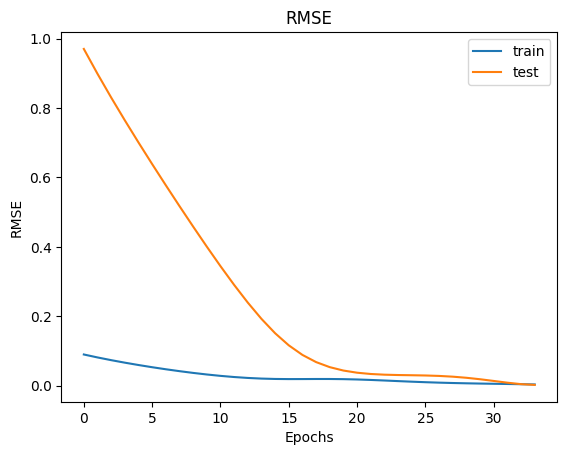

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])


1/1 [==============================] - 0s 33ms/step


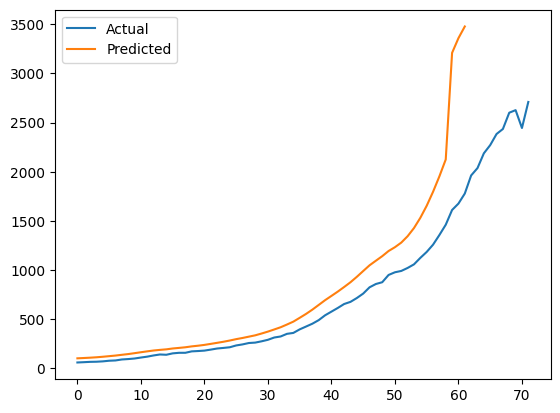

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['co2'].values, label='Actual')
plt.plot(np.concatenate([train_predictions, test_predictions]), label='Predicted')
plt.legend()
plt.show()

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(df['co2'].values)
ax1.set_title('Actual CO2 Concentration')

ax2.plot(np.concatenate([train_predictions, test_predictions]))
ax2.set_title('Predicted CO2 Concentration')

plt.show()


NameError: name 'plt' is not defined

In [18]:
last_time_steps = df[-time_steps:]
future_predictions = []
for i in range(36): 
    next_prediction = model.predict(last_time_steps.reshape(1, time_steps, 1))
    future_predictions.append(next_prediction[0,0])
    last_time_steps = np.concatenate([last_time_steps[1:], next_prediction], axis=0)


AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

In [1]:
X_train

NameError: name 'X_train' is not defined